Importamos las librerias necesarias para el analisis de datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Leemos el archivo formato csv con la info que queremos buscar, y revisamos las columnas y posibles elementos nulos.

In [2]:
df = pd.read_csv('best-selling-books.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


Revisamos si hay filas duplicadas

In [3]:
print(f"Cantidad de filas duplicadas: {df[df.duplicated].shape[0]:,}")
df[df.duplicated]

Cantidad de filas duplicadas: 0


,Book,Author(s),Original language,First published,Approximate sales in millions,Genre


Removemos las filas cuales tienen elementos nulos en la columna ```'Genre'``` y revisamos nuevamente.

In [4]:
df_clean = df.dropna(subset=['Genre'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           118 non-null    object 
 1   Author(s)                      118 non-null    object 
 2   Original language              118 non-null    object 
 3   First published                118 non-null    int64  
 4   Approximate sales in millions  118 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ KB


Eliminamos espacios antes y después de los generos en la columna ```'Genre'``` y los estandarizamos haciendo que esten en minusculas.

In [5]:
df_clean_final = df_clean[df_clean['Genre'].str.strip() != '']
df_clean_final['Genre'] = df_clean_final['Genre'].str.strip()
df_clean_final['Genre'] = df_clean_final['Genre'].str.lower()
df_clean_final['Genre'].unique()

array(['historical fiction', 'novella', 'fantasy', 'mystery',
       'family saga', "fantasy, children's fiction", 'adventure',
       'detective', 'mystery thriller', 'coming-of-age', 'romance',
       'self-help', 'magic realism', 'novel', "children's fiction",
       'manual', "children's novel", "children's literature",
       'historical novel, mystery', 'war, thriller', 'sexology',
       'novella, self-help', "children's literature, picture book",
       'essay/literature', 'southern gothic, bildungsroman',
       'gothic horror, family saga',
       'popular science, anthropology, astrophysics, cosmology, philosophy, history',
       'philosophical novel, young adult', 'mystery-thriller',
       'socialist realist novel', 'historical novel',
       'historical non-fiction, autobiography, memoir, bildungsroman / coming of age, jewish literature',
       'romantic family saga', 'christian literature',
       'bildungsroman, historical fiction', 'novel, tragedy',
       'gothic no

Buscamos los generos que nos interesan en ```'Genre'``` y los añadimos a un nuevo DataFrame.

In [6]:
generos_buscados = ['anthropology', 'astrophysics', 'philosophy,', 
                    'history', 'popular science', 'essay/literature', 'cosmology'
                    , 'social science,']
patron = '|'.join(generos_buscados)
libros_estudio = df_clean_final[df_clean_final['Genre'].str.contains(patron, na=False)]
print(f'La cantidad de libros Best Sellers es: {len(df_clean_final)}')
print(f'La cantidad de libros de estudios es: {len(libros_estudio)}')
libros_estudio.head()

#Este codigo fue generado con ayuda de ChatGPT bajo el prompt: 'tengo un dataframe de pandas de libros los cuales tienen la columna 'Genre' como puedo buscar los genres que tengo en una lista en el dataframe'

La cantidad de libros Best Sellers es: 118
La cantidad de libros de estudios es: 4


,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
36,A Message to Garcia,Elbert Hubbard,English,1899,40.0,essay/literature
39,Cosmos,Carl Sagan,English,1980,40.0,"popular science, anthropology, astrophysics, c..."
65,A Brief History of Time,Stephen Hawking,English,1988,25.0,popular science
105,The Naked Ape,Desmond Morris,English,1968,20.0,"social science, anthropology, psychology"


Eliminamos los libros que queriamos encontrar del DataFrame con todos los libros y revisamos.

In [7]:
nuevo_df = df_clean_final.drop(libros_estudio.index)
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           114 non-null    object 
 1   Author(s)                      114 non-null    object 
 2   Original language              114 non-null    object 
 3   First published                114 non-null    int64  
 4   Approximate sales in millions  114 non-null    float64
 5   Genre                          114 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.2+ KB


Creamos un grafico para comparar ventas de los libros de estudio con las ventas de los demás libros.

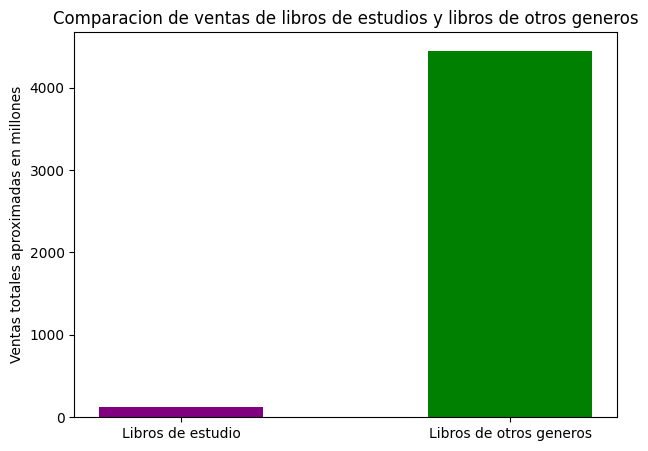

Ventas totales aproximadas en millones de los libros de estudio: 125.0
Ventas totales aproximadas en millones de libros de otros generos: 4449.0


In [8]:
total_ventas_estudio = libros_estudio['Approximate sales in millions'].sum().round()
total_ventas_demas = nuevo_df['Approximate sales in millions'].sum().round()

labels = ['Libros de estudio', 'Libros de otros generos']
valores = [total_ventas_estudio, total_ventas_demas]
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(labels, valores, color=['purple', 'green'], width=0.5)
ax.set_ylabel('Ventas totales aproximadas en millones')
ax.set_title('Comparacion de ventas de libros de estudios y libros de otros generos')
plt.show()

print(f'Ventas totales aproximadas en millones de los libros de estudio: {total_ventas_estudio}')
print(f'Ventas totales aproximadas en millones de libros de otros generos: {total_ventas_demas}')

En base a estos datos podemos ver que tan solo 4 de los 118 libros Best Seller son libros de estudio, esto acompañado con la cantidad de ventas de 125 millones de ventas de libros de estudios a comparación de los 4449 millones de ventas de los libros de otros generos, nos permite concluir que el uso de libros de estudio en el Siglo XXI va cada vez mas en decadencia.